In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [51]:
df = pd.read_excel("sensor_data_with_leak_criteria.xlsx")
df.head()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
0,2024-02-23 23:58:36.844,31.350482,24.512473,20769.942089,0.924828,-56.184283,-135.790512,0
1,2024-02-23 23:59:36.844,33.601926,18.341114,13338.621002,1.007110,-18.177041,-94.370919,0
2,2024-02-24 00:00:36.844,27.168325,20.226577,21336.979039,0.996731,82.022969,-12.416933,0
3,2024-02-24 00:01:36.844,23.667089,24.816830,13791.113004,0.840567,27.712963,-148.773566,0
4,2024-02-24 00:02:36.844,33.614343,18.871114,17336.508579,0.860219,-57.300856,19.823467,0


In [52]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Timestamp', 'Latitude', 'Longitude', 'Leak Condition'])
y = df['Leak Condition']


In [20]:
X.head()

,Pressure,Temperature,Frequency,Amplitude
0,31.350482,24.512473,20769.942089,0.924828
1,33.601926,18.341114,13338.621002,1.007110
2,27.168325,20.226577,21336.979039,0.996731
3,23.667089,24.816830,13791.113004,0.840567
4,33.614343,18.871114,17336.508579,0.860219


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Leak Condition, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 1)

In [23]:
X_train.shape

(80, 4)

In [24]:
X_test.shape

(20, 4)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [34]:
X_test_scaled

array([[0.18350207, 0.62679951, 0.24910082, 0.30418738],
       [0.23733498, 0.82324585, 0.92842633, 0.44515218],
       [0.47324372, 0.27113493, 0.        , 0.34703159],
       [0.45356347, 0.8322399 , 0.41639836, 0.68182904],
       [0.06626863, 0.83246623, 0.78298789, 0.31627143],
       [0.25760003, 0.91771611, 0.14088315, 0.98870069],
       [0.67764077, 0.36104288, 0.70055614, 0.90346508],
       [0.09808554, 0.43373241, 0.75614658, 0.57211112],
       [0.39393764, 0.66839633, 0.63447206, 0.2250063 ],
       [0.        , 0.        , 0.39641479, 0.05936129],
       [0.28360854, 1.        , 0.5866569 , 0.26810063],
       [0.24151346, 0.24010107, 0.24888796, 0.66923397],
       [0.41475183, 0.15256205, 1.        , 0.        ],
       [0.8645168 , 0.82969588, 0.27703381, 0.13327599],
       [0.78617355, 0.83406059, 0.68878677, 0.69638959],
       [0.85815652, 0.44728375, 0.39030143, 1.        ],
       [0.18351962, 0.09218396, 0.09634523, 0.50030069],
       [1.        , 0.82431251,

In [35]:
X_train_scaled

array([[0.29300415, 0.75477453, 0.9334361 , 0.49421489],
       [0.85160628, 0.63233978, 0.8904609 , 0.91828008],
       [0.59822231, 0.93453854, 1.        , 0.25011658],
       [0.88010824, 0.9408747 , 0.58427002, 0.84358955],
       [0.89057059, 0.11630983, 0.42114193, 0.09217957],
       [0.72511853, 0.90164405, 0.83969075, 0.32263129],
       [0.35972434, 0.68204201, 0.9444548 , 0.80048981],
       [0.83179875, 0.26102578, 0.69703257, 0.59934349],
       [0.80930167, 0.47077995, 0.50527367, 0.33289447],
       [0.01630546, 0.69058956, 0.84723984, 0.56710464],
       [0.2886896 , 0.9385141 , 0.57766338, 0.24831936],
       [0.30231664, 0.05241421, 0.25673586, 0.1923792 ],
       [0.13292727, 0.64634292, 0.37996662, 0.82615991],
       [0.96324975, 0.61821148, 0.95385404, 0.20093271],
       [0.2444774 , 0.93029846, 0.20659202, 0.54000723],
       [0.        , 0.96158755, 0.58415824, 0.34120931],
       [0.07424331, 0.08589954, 0.54701113, 0.41028281],
       [0.46142526, 0.54694315,

In [55]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [56]:
model = Sequential()
model.add(Dense(3, activation= 'sigmoid', input_dim = 4))
model.add(Dense(1, activation ='sigmoid'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [59]:
history= model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 16ms/step - loss: 0.5634
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 0.5618
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.5603
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: 0.5594
Epoch 5/10
3/3 [==============================] - 0s 8ms/step - loss: 0.5581
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 0.5567
Epoch 7/10
3/3 [==============================] - 0s 6ms/step - loss: 0.5555
Epoch 8/10
3/3 [==============================] - 0s 7ms/step - loss: 0.5545
Epoch 9/10
3/3 [==============================] - 0s 7ms/step - loss: 0.5530
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 0.5519


In [60]:
import matplotlib.pyplot as plt

In [61]:
history.history

{'loss': [0.563420295715332,
  0.5618119239807129,
  0.5602658987045288,
  0.5594146847724915,
  0.5581125020980835,
  0.5567303895950317,
  0.5555280447006226,
  0.5544768571853638,
  0.5530447959899902,
  0.5519097447395325]}

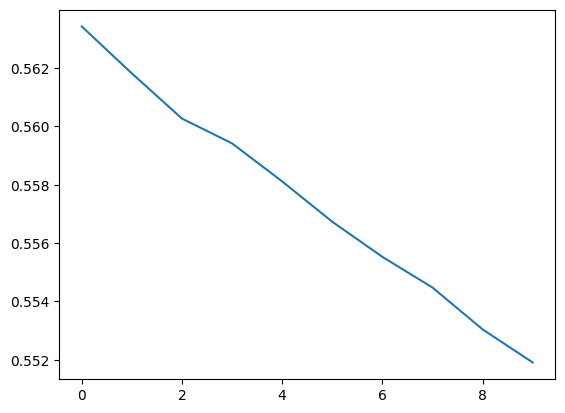

In [62]:
plt.plot(history.history['loss'])

In [63]:
model.layers[0].get_weights()

[array([[-0.7162815 ,  0.21145964, -0.13551368],
        [-0.659876  ,  0.83071136, -0.8243117 ],
        [ 0.5833848 ,  0.7693938 ,  0.5119519 ],
        [-0.8817698 , -0.2718428 , -0.04983427]], dtype=float32),
 array([ 0.02443692,  0.0230213 , -0.02424615], dtype=float32)]

In [64]:
y_log = model.predict(X_test_scaled)

1/1 [==============================] - 0s 128ms/step


In [65]:
y_pred = np.where(y_log>0.5,1,0)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

# Accuracy is 90%

# Improving Accuracy

In [70]:
model = Sequential()

model.add(Dense(12, activation= 'relu', input_dim = 4))
model.add(Dense(12, activation= 'relu'))
model.add(Dense(1, activation ='sigmoid'))

# changing dense from 3 to 11
# changing activation function to relu

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                60        
                                                                 
 dense_10 (Dense)            (None, 12)                156       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split = 0.2)

Epoch 1/1000
2/2 [==============================] - 2s 378ms/step - loss: 0.7000 - accuracy: 0.3438 - val_loss: 0.7041 - val_accuracy: 0.1875
Epoch 2/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.6973 - accuracy: 0.3594 - val_loss: 0.7032 - val_accuracy: 0.1875
Epoch 3/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.6942 - accuracy: 0.4219 - val_loss: 0.7024 - val_accuracy: 0.3125
Epoch 4/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.6915 - accuracy: 0.5312 - val_loss: 0.7016 - val_accuracy: 0.3750
Epoch 5/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.6887 - accuracy: 0.6250 - val_loss: 0.7007 - val_accuracy: 0.3750
Epoch 6/1000
2/2 [==============================] - 0s 69ms/step - loss: 0.6860 - accuracy: 0.6562 - val_loss: 0.6999 - val_accuracy: 0.4375
Epoch 7/1000
2/2 [==============================] - 0s 80ms/step - loss: 0.6831 - accuracy: 0.7188 - val_loss: 0.6992 - val_accuracy: 0.4375
Epoch 8/1000

Epoch 59/1000
2/2 [==============================] - 0s 79ms/step - loss: 0.4727 - accuracy: 0.8281 - val_loss: 0.7295 - val_accuracy: 0.5625
Epoch 60/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.4695 - accuracy: 0.8281 - val_loss: 0.7332 - val_accuracy: 0.5625
Epoch 61/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.4662 - accuracy: 0.8281 - val_loss: 0.7370 - val_accuracy: 0.5625
Epoch 62/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.4630 - accuracy: 0.8281 - val_loss: 0.7410 - val_accuracy: 0.5625
Epoch 63/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.4603 - accuracy: 0.8281 - val_loss: 0.7451 - val_accuracy: 0.5625
Epoch 64/1000
2/2 [==============================] - 0s 69ms/step - loss: 0.4567 - accuracy: 0.8281 - val_loss: 0.7488 - val_accuracy: 0.5625
Epoch 65/1000
2/2 [==============================] - 0s 72ms/step - loss: 0.4536 - accuracy: 0.8281 - val_loss: 0.7524 - val_accuracy: 0.5625
Epoch 

2/2 [==============================] - 0s 74ms/step - loss: 0.3822 - accuracy: 0.8281 - val_loss: 0.8742 - val_accuracy: 0.5625
Epoch 117/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.3813 - accuracy: 0.8281 - val_loss: 0.8746 - val_accuracy: 0.5625
Epoch 118/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.3800 - accuracy: 0.8281 - val_loss: 0.8754 - val_accuracy: 0.5625
Epoch 119/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.3793 - accuracy: 0.8281 - val_loss: 0.8770 - val_accuracy: 0.5625
Epoch 120/1000
2/2 [==============================] - 0s 60ms/step - loss: 0.3782 - accuracy: 0.8281 - val_loss: 0.8769 - val_accuracy: 0.5625
Epoch 121/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.3773 - accuracy: 0.8281 - val_loss: 0.8773 - val_accuracy: 0.5625
Epoch 122/1000
2/2 [==============================] - 0s 77ms/step - loss: 0.3763 - accuracy: 0.8281 - val_loss: 0.8780 - val_accuracy: 0.5625
Epoch 123/100

2/2 [==============================] - 0s 79ms/step - loss: 0.3372 - accuracy: 0.8594 - val_loss: 0.8981 - val_accuracy: 0.5625
Epoch 174/1000
2/2 [==============================] - 0s 118ms/step - loss: 0.3365 - accuracy: 0.8594 - val_loss: 0.8978 - val_accuracy: 0.5625
Epoch 175/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.3359 - accuracy: 0.8594 - val_loss: 0.8980 - val_accuracy: 0.5625
Epoch 176/1000
2/2 [==============================] - 0s 98ms/step - loss: 0.3352 - accuracy: 0.8594 - val_loss: 0.8974 - val_accuracy: 0.5625
Epoch 177/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.3345 - accuracy: 0.8594 - val_loss: 0.8966 - val_accuracy: 0.5625
Epoch 178/1000
2/2 [==============================] - 0s 71ms/step - loss: 0.3341 - accuracy: 0.8594 - val_loss: 0.8950 - val_accuracy: 0.5625
Epoch 179/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.3333 - accuracy: 0.8594 - val_loss: 0.8958 - val_accuracy: 0.5625
Epoch 180/100

2/2 [==============================] - 0s 63ms/step - loss: 0.3003 - accuracy: 0.8750 - val_loss: 0.8617 - val_accuracy: 0.5625
Epoch 231/1000
2/2 [==============================] - 0s 82ms/step - loss: 0.2993 - accuracy: 0.8750 - val_loss: 0.8627 - val_accuracy: 0.5625
Epoch 232/1000
2/2 [==============================] - 0s 77ms/step - loss: 0.2986 - accuracy: 0.8750 - val_loss: 0.8624 - val_accuracy: 0.5625
Epoch 233/1000
2/2 [==============================] - 0s 75ms/step - loss: 0.2980 - accuracy: 0.8750 - val_loss: 0.8626 - val_accuracy: 0.5625
Epoch 234/1000
2/2 [==============================] - 0s 75ms/step - loss: 0.2974 - accuracy: 0.8750 - val_loss: 0.8625 - val_accuracy: 0.5625
Epoch 235/1000
2/2 [==============================] - 0s 73ms/step - loss: 0.2966 - accuracy: 0.8750 - val_loss: 0.8605 - val_accuracy: 0.5625
Epoch 236/1000
2/2 [==============================] - 0s 73ms/step - loss: 0.2959 - accuracy: 0.8750 - val_loss: 0.8600 - val_accuracy: 0.5625
Epoch 237/1000

2/2 [==============================] - 0s 60ms/step - loss: 0.2612 - accuracy: 0.8594 - val_loss: 0.8067 - val_accuracy: 0.6250
Epoch 288/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.2604 - accuracy: 0.8594 - val_loss: 0.8050 - val_accuracy: 0.6250
Epoch 289/1000
2/2 [==============================] - 0s 76ms/step - loss: 0.2599 - accuracy: 0.8594 - val_loss: 0.8026 - val_accuracy: 0.6250
Epoch 290/1000
2/2 [==============================] - 0s 77ms/step - loss: 0.2594 - accuracy: 0.8594 - val_loss: 0.8036 - val_accuracy: 0.6250
Epoch 291/1000
2/2 [==============================] - 0s 71ms/step - loss: 0.2588 - accuracy: 0.8594 - val_loss: 0.8021 - val_accuracy: 0.6250
Epoch 292/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.2587 - accuracy: 0.8594 - val_loss: 0.7968 - val_accuracy: 0.6250
Epoch 293/1000
2/2 [==============================] - 0s 74ms/step - loss: 0.2575 - accuracy: 0.8594 - val_loss: 0.7971 - val_accuracy: 0.6250
Epoch 294/1000

2/2 [==============================] - 0s 118ms/step - loss: 0.2277 - accuracy: 0.8906 - val_loss: 0.7482 - val_accuracy: 0.5625
Epoch 345/1000
2/2 [==============================] - 0s 122ms/step - loss: 0.2269 - accuracy: 0.8906 - val_loss: 0.7444 - val_accuracy: 0.5625
Epoch 346/1000
2/2 [==============================] - 0s 105ms/step - loss: 0.2261 - accuracy: 0.8906 - val_loss: 0.7431 - val_accuracy: 0.5625
Epoch 347/1000
2/2 [==============================] - 0s 85ms/step - loss: 0.2256 - accuracy: 0.8906 - val_loss: 0.7411 - val_accuracy: 0.5625
Epoch 348/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.2255 - accuracy: 0.8906 - val_loss: 0.7427 - val_accuracy: 0.5625
Epoch 349/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.2247 - accuracy: 0.8906 - val_loss: 0.7394 - val_accuracy: 0.5625
Epoch 350/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.2239 - accuracy: 0.8906 - val_loss: 0.7378 - val_accuracy: 0.5625
Epoch 351/1

2/2 [==============================] - 0s 99ms/step - loss: 0.1990 - accuracy: 0.9062 - val_loss: 0.7093 - val_accuracy: 0.5625
Epoch 402/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.1984 - accuracy: 0.9062 - val_loss: 0.7093 - val_accuracy: 0.5625
Epoch 403/1000
2/2 [==============================] - 0s 69ms/step - loss: 0.1980 - accuracy: 0.9062 - val_loss: 0.7099 - val_accuracy: 0.5625
Epoch 404/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.1978 - accuracy: 0.9062 - val_loss: 0.7070 - val_accuracy: 0.5625
Epoch 405/1000
2/2 [==============================] - 0s 75ms/step - loss: 0.1970 - accuracy: 0.9062 - val_loss: 0.7067 - val_accuracy: 0.5625
Epoch 406/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.1968 - accuracy: 0.9062 - val_loss: 0.7087 - val_accuracy: 0.5625
Epoch 407/1000
2/2 [==============================] - 0s 79ms/step - loss: 0.1964 - accuracy: 0.9062 - val_loss: 0.7104 - val_accuracy: 0.5625
Epoch 408/1000

2/2 [==============================] - 0s 93ms/step - loss: 0.1757 - accuracy: 0.9219 - val_loss: 0.6858 - val_accuracy: 0.5625
Epoch 459/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.1765 - accuracy: 0.9219 - val_loss: 0.6811 - val_accuracy: 0.5000
Epoch 460/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.1751 - accuracy: 0.9219 - val_loss: 0.6843 - val_accuracy: 0.5625
Epoch 461/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.1744 - accuracy: 0.9219 - val_loss: 0.6845 - val_accuracy: 0.5625
Epoch 462/1000
2/2 [==============================] - 0s 85ms/step - loss: 0.1741 - accuracy: 0.9219 - val_loss: 0.6845 - val_accuracy: 0.5625
Epoch 463/1000
2/2 [==============================] - 0s 85ms/step - loss: 0.1738 - accuracy: 0.9219 - val_loss: 0.6866 - val_accuracy: 0.5625
Epoch 464/1000
2/2 [==============================] - 0s 86ms/step - loss: 0.1734 - accuracy: 0.9219 - val_loss: 0.6852 - val_accuracy: 0.5625
Epoch 465/1000

2/2 [==============================] - 0s 77ms/step - loss: 0.1563 - accuracy: 0.9219 - val_loss: 0.6654 - val_accuracy: 0.5000
Epoch 516/1000
2/2 [==============================] - 0s 85ms/step - loss: 0.1558 - accuracy: 0.9219 - val_loss: 0.6662 - val_accuracy: 0.5000
Epoch 517/1000
2/2 [==============================] - 0s 86ms/step - loss: 0.1555 - accuracy: 0.9219 - val_loss: 0.6676 - val_accuracy: 0.5000
Epoch 518/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.1552 - accuracy: 0.9219 - val_loss: 0.6663 - val_accuracy: 0.5000
Epoch 519/1000
2/2 [==============================] - 0s 76ms/step - loss: 0.1548 - accuracy: 0.9219 - val_loss: 0.6657 - val_accuracy: 0.5000
Epoch 520/1000
2/2 [==============================] - 0s 72ms/step - loss: 0.1547 - accuracy: 0.9219 - val_loss: 0.6678 - val_accuracy: 0.5000
Epoch 521/1000
2/2 [==============================] - 0s 83ms/step - loss: 0.1541 - accuracy: 0.9375 - val_loss: 0.6686 - val_accuracy: 0.5000
Epoch 522/1000

2/2 [==============================] - 0s 128ms/step - loss: 0.1395 - accuracy: 0.9688 - val_loss: 0.6604 - val_accuracy: 0.6250
Epoch 573/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.1392 - accuracy: 0.9688 - val_loss: 0.6587 - val_accuracy: 0.6250
Epoch 574/1000
2/2 [==============================] - 0s 64ms/step - loss: 0.1388 - accuracy: 0.9688 - val_loss: 0.6580 - val_accuracy: 0.6250
Epoch 575/1000
2/2 [==============================] - 0s 103ms/step - loss: 0.1386 - accuracy: 0.9688 - val_loss: 0.6579 - val_accuracy: 0.6250
Epoch 576/1000
2/2 [==============================] - 0s 120ms/step - loss: 0.1383 - accuracy: 0.9688 - val_loss: 0.6562 - val_accuracy: 0.6250
Epoch 577/1000
2/2 [==============================] - 0s 116ms/step - loss: 0.1380 - accuracy: 0.9688 - val_loss: 0.6560 - val_accuracy: 0.6250
Epoch 578/1000
2/2 [==============================] - 0s 122ms/step - loss: 0.1378 - accuracy: 0.9688 - val_loss: 0.6551 - val_accuracy: 0.6250
Epoch 579

2/2 [==============================] - 0s 61ms/step - loss: 0.1246 - accuracy: 0.9688 - val_loss: 0.6551 - val_accuracy: 0.7500
Epoch 630/1000
2/2 [==============================] - 0s 80ms/step - loss: 0.1242 - accuracy: 0.9688 - val_loss: 0.6553 - val_accuracy: 0.7500
Epoch 631/1000
2/2 [==============================] - 0s 80ms/step - loss: 0.1240 - accuracy: 0.9688 - val_loss: 0.6560 - val_accuracy: 0.7500
Epoch 632/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.1237 - accuracy: 0.9688 - val_loss: 0.6555 - val_accuracy: 0.7500
Epoch 633/1000
2/2 [==============================] - 0s 101ms/step - loss: 0.1234 - accuracy: 0.9688 - val_loss: 0.6557 - val_accuracy: 0.7500
Epoch 634/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.1231 - accuracy: 0.9688 - val_loss: 0.6556 - val_accuracy: 0.7500
Epoch 635/1000
2/2 [==============================] - 0s 80ms/step - loss: 0.1230 - accuracy: 0.9688 - val_loss: 0.6553 - val_accuracy: 0.7500
Epoch 636/100

2/2 [==============================] - 0s 121ms/step - loss: 0.1098 - accuracy: 0.9688 - val_loss: 0.6566 - val_accuracy: 0.7500
Epoch 687/1000
2/2 [==============================] - 0s 127ms/step - loss: 0.1098 - accuracy: 0.9688 - val_loss: 0.6558 - val_accuracy: 0.7500
Epoch 688/1000
2/2 [==============================] - 0s 116ms/step - loss: 0.1094 - accuracy: 0.9688 - val_loss: 0.6560 - val_accuracy: 0.7500
Epoch 689/1000
2/2 [==============================] - 0s 121ms/step - loss: 0.1092 - accuracy: 0.9688 - val_loss: 0.6565 - val_accuracy: 0.7500
Epoch 690/1000
2/2 [==============================] - 0s 105ms/step - loss: 0.1089 - accuracy: 0.9688 - val_loss: 0.6576 - val_accuracy: 0.7500
Epoch 691/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.1087 - accuracy: 0.9688 - val_loss: 0.6581 - val_accuracy: 0.7500
Epoch 692/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.1088 - accuracy: 0.9688 - val_loss: 0.6566 - val_accuracy: 0.7500
Epoch 693

2/2 [==============================] - 0s 79ms/step - loss: 0.0971 - accuracy: 0.9688 - val_loss: 0.6590 - val_accuracy: 0.7500
Epoch 744/1000
2/2 [==============================] - 0s 103ms/step - loss: 0.0969 - accuracy: 0.9688 - val_loss: 0.6594 - val_accuracy: 0.7500
Epoch 745/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.0967 - accuracy: 0.9688 - val_loss: 0.6593 - val_accuracy: 0.7500
Epoch 746/1000
2/2 [==============================] - 0s 84ms/step - loss: 0.0965 - accuracy: 0.9688 - val_loss: 0.6593 - val_accuracy: 0.7500
Epoch 747/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.0966 - accuracy: 0.9688 - val_loss: 0.6607 - val_accuracy: 0.7500
Epoch 748/1000
2/2 [==============================] - 0s 100ms/step - loss: 0.0962 - accuracy: 0.9688 - val_loss: 0.6615 - val_accuracy: 0.7500
Epoch 749/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.0960 - accuracy: 0.9688 - val_loss: 0.6614 - val_accuracy: 0.7500
Epoch 750/10

2/2 [==============================] - 0s 71ms/step - loss: 0.0867 - accuracy: 0.9844 - val_loss: 0.6653 - val_accuracy: 0.7500
Epoch 801/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.0864 - accuracy: 0.9844 - val_loss: 0.6651 - val_accuracy: 0.7500
Epoch 802/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.0863 - accuracy: 0.9844 - val_loss: 0.6654 - val_accuracy: 0.7500
Epoch 803/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.0861 - accuracy: 0.9844 - val_loss: 0.6655 - val_accuracy: 0.7500
Epoch 804/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.0861 - accuracy: 0.9844 - val_loss: 0.6664 - val_accuracy: 0.7500
Epoch 805/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.0858 - accuracy: 0.9844 - val_loss: 0.6660 - val_accuracy: 0.7500
Epoch 806/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.0856 - accuracy: 0.9844 - val_loss: 0.6663 - val_accuracy: 0.7500
Epoch 807/1000

2/2 [==============================] - 0s 131ms/step - loss: 0.0779 - accuracy: 0.9844 - val_loss: 0.6776 - val_accuracy: 0.7500
Epoch 858/1000
2/2 [==============================] - 0s 134ms/step - loss: 0.0779 - accuracy: 0.9844 - val_loss: 0.6774 - val_accuracy: 0.7500
Epoch 859/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.0777 - accuracy: 0.9844 - val_loss: 0.6778 - val_accuracy: 0.7500
Epoch 860/1000
2/2 [==============================] - 0s 139ms/step - loss: 0.0775 - accuracy: 0.9844 - val_loss: 0.6775 - val_accuracy: 0.7500
Epoch 861/1000
2/2 [==============================] - 0s 138ms/step - loss: 0.0775 - accuracy: 0.9844 - val_loss: 0.6770 - val_accuracy: 0.7500
Epoch 862/1000
2/2 [==============================] - 0s 141ms/step - loss: 0.0773 - accuracy: 0.9844 - val_loss: 0.6769 - val_accuracy: 0.7500
Epoch 863/1000
2/2 [==============================] - 0s 136ms/step - loss: 0.0773 - accuracy: 0.9844 - val_loss: 0.6765 - val_accuracy: 0.7500
Epoch 8

2/2 [==============================] - 0s 101ms/step - loss: 0.0709 - accuracy: 0.9844 - val_loss: 0.6925 - val_accuracy: 0.7500
Epoch 915/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.0708 - accuracy: 0.9844 - val_loss: 0.6936 - val_accuracy: 0.7500
Epoch 916/1000
2/2 [==============================] - 0s 73ms/step - loss: 0.0704 - accuracy: 0.9844 - val_loss: 0.6942 - val_accuracy: 0.7500
Epoch 917/1000
2/2 [==============================] - 0s 72ms/step - loss: 0.0705 - accuracy: 0.9844 - val_loss: 0.6951 - val_accuracy: 0.7500
Epoch 918/1000
2/2 [==============================] - 0s 76ms/step - loss: 0.0705 - accuracy: 0.9844 - val_loss: 0.6953 - val_accuracy: 0.7500
Epoch 919/1000
2/2 [==============================] - 0s 77ms/step - loss: 0.0702 - accuracy: 0.9844 - val_loss: 0.6957 - val_accuracy: 0.7500
Epoch 920/1000
2/2 [==============================] - 0s 73ms/step - loss: 0.0701 - accuracy: 0.9844 - val_loss: 0.6963 - val_accuracy: 0.7500
Epoch 921/100

2/2 [==============================] - 0s 66ms/step - loss: 0.0635 - accuracy: 0.9844 - val_loss: 0.7179 - val_accuracy: 0.7500
Epoch 972/1000
2/2 [==============================] - 0s 79ms/step - loss: 0.0631 - accuracy: 0.9844 - val_loss: 0.7184 - val_accuracy: 0.7500
Epoch 973/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.0630 - accuracy: 0.9844 - val_loss: 0.7189 - val_accuracy: 0.7500
Epoch 974/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0629 - accuracy: 0.9844 - val_loss: 0.7190 - val_accuracy: 0.7500
Epoch 975/1000
2/2 [==============================] - 0s 84ms/step - loss: 0.0627 - accuracy: 0.9844 - val_loss: 0.7194 - val_accuracy: 0.7500
Epoch 976/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.0629 - accuracy: 0.9844 - val_loss: 0.7204 - val_accuracy: 0.7500
Epoch 977/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.0625 - accuracy: 0.9844 - val_loss: 0.7206 - val_accuracy: 0.7500
Epoch 978/1000

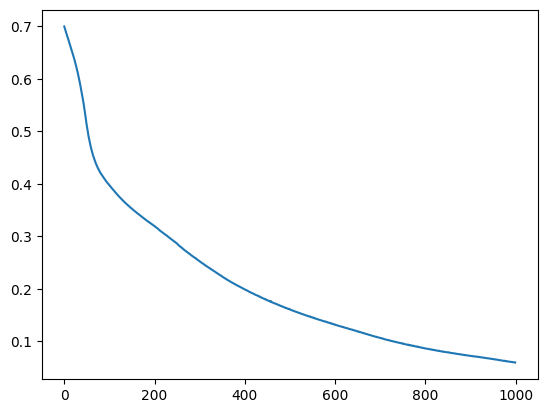

In [73]:
plt.plot(history.history['loss'])

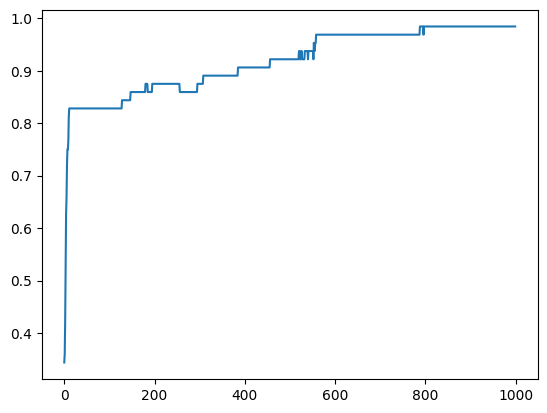

In [78]:
plt.plot(history.history['accuracy'])

In [82]:
model.layers[0].get_weights()

[array([[-0.04477099, -1.5802492 , -0.6040617 , -0.07122146,  0.35114625,
          0.7549155 , -0.08849072, -1.1670921 , -0.12529288,  0.12125606,
          0.6730874 ,  0.74033594],
        [ 1.3207331 ,  0.5709559 ,  0.01795908, -0.69807136,  1.4330916 ,
          0.46936142, -0.12514824,  0.38148624, -1.4366608 , -0.3603703 ,
          0.61398256, -0.9636191 ],
        [ 0.35882053,  0.11187682, -0.19889651,  0.5269334 ,  0.35072005,
          0.19431981, -0.22783905,  0.39700067,  1.0798358 , -0.5181317 ,
         -0.54959786, -0.45406172],
        [ 0.16679257,  0.57289994,  0.02770707,  0.8880695 ,  0.4092552 ,
         -0.26002246, -0.40360743,  0.18138589, -0.6715367 ,  1.1606032 ,
          1.3221451 ,  0.64618176]], dtype=float32),
 array([ 0.3199263 , -0.05868632, -0.02426307,  0.05921069,  0.46539685,
         0.41712302,  0.        ,  0.05356004,  0.3555839 ,  0.15378846,
         0.34264204, -0.31620157], dtype=float32)]

In [83]:
model.layers[1].get_weights()

[array([[ 0.2733428 , -0.25207704, -0.32534546, -0.38296035, -0.57466084,
          0.24558648, -0.05184031,  0.91905344,  0.09440832, -0.46887708,
         -0.21146394,  0.6927287 ],
        [-1.1816494 ,  1.5049963 , -0.15854466,  1.5851438 ,  1.5030336 ,
         -1.6018777 , -0.33189726, -1.8783708 , -0.53755456, -0.11563134,
         -1.4417592 , -1.2028686 ],
        [ 0.12423408,  0.41486079,  0.39882815, -0.42901385, -0.3412236 ,
         -0.17349589,  0.17729712, -0.4647228 ,  0.01136613,  0.49593568,
         -0.01795733,  0.46288002],
        [-0.8703477 ,  1.1863786 ,  0.3553887 ,  0.7234291 ,  0.31045416,
          0.41553006, -0.40348923, -0.8436184 , -0.3382775 ,  0.31631577,
          0.57436043, -0.00812083],
        [ 0.5551305 , -0.11841673, -0.03635249,  0.08564875,  0.05235403,
         -0.265369  , -0.06824768,  0.23048924, -0.06113057, -0.09658551,
          0.15642409,  0.48845205],
        [ 0.68767786, -0.74043894, -0.22601065, -0.2913097 , -0.39464593,
      

In [84]:
model.layers[2].get_weights()

[array([[-1.6815411 ],
        [ 1.2205241 ],
        [-0.48700958],
        [ 1.5165192 ],
        [ 1.0891815 ],
        [ 1.3775595 ],
        [ 0.03145301],
        [-0.8887329 ],
        [ 0.43827337],
        [-0.13275641],
        [ 1.3178812 ],
        [-0.84786946]], dtype=float32),
 array([-0.19343702], dtype=float32)]

In [90]:
y_log = model.predict(X_test_scaled)

1/1 [==============================] - 0s 457ms/step


In [86]:
y_pred = np.where(y_log>0.5,1,0)

0.8